In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose 
  
# # Read the employment dataset 
# data=pd.read_excel('IVI_DATA.xlsx',)

In [155]:
# Read the employment dataset 
data=pd.read_excel('IVI_DATA.xlsx',sheet_name='4 digit 3 month average')
data.drop(['ANZSCO_CODE','state'],axis=1,inplace=True)

In [168]:
df=data.copy()

In [169]:
df=df.T

In [101]:
df

,0,1,2,3,4,5,6,7,8,9,...,3221,3222,3223,3224,3225,3226,3227,3228,3229,3230
ANZSCO_TITLE,Australia Total,Chief Executives and Managing Directors,General Managers,Legislators,Aquaculture Farmers,Crop Farmers,Livestock Farmers,Mixed Crop and Livestock Farmers,Advertising and Sales Managers,Corporate Services Managers,...,Freight and Furniture Handlers,Shelf Fillers,Caretakers,Deck and Fishing Hands,Handypersons,Motor Vehicle Parts and Accessories Fitters,Printing Assistants and Table Workers,Recycling and Rubbish Collectors,Vending Machine Attendants,Other Miscellaneous Labourers
2006-03-01 00:00:00,214669,158.853,308.895,.,0.66667,25.7392,35.1692,69.7875,6397.5,543.758,...,2.02417,2,2.66667,0,5.66667,3.02417,1.07252,0.33333,0,75.4059
2006-04-01 00:00:00,213341,160.573,308.416,.,1.33333,33.145,33.5509,63.43,6416.68,558.661,...,2.33333,1.66667,2.33333,0,4.66667,3.04835,0.69084,0.33333,0,76.7875
2006-05-01 00:00:00,222176,180.529,319.943,.,1.33333,32.8359,35.9084,63.7634,6649.76,583.521,...,2,2,1.33333,0,3.33333,3.38168,1.35751,0.33333,0,76.4784
2006-06-01 00:00:00,223386,207.433,311.29,.,1.33333,22.8601,34.5509,58.0967,6778.27,590.182,...,1.66667,2.02417,0.66667,0,2.35751,1.69084,2.66667,0,0,61.4784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01 00:00:00,152821,290,432.333,0,1.33333,10.6667,41.6667,63.6667,5034,487.333,...,3.66667,0.66667,0.33333,0,13.6667,1.66667,0.33333,0,0,77
2020-03-01 00:00:00,156658,296.333,437,0,0.66667,7.66667,52.6667,64.6667,5114.67,512,...,4,1.33333,0.33333,0,12.6667,1.33333,0.33333,0,0,72.3333
2020-04-01 00:00:00,118114,234.333,325.667,.,0.33333,6.66667,42.6667,56,3518.33,377,...,1.66667,1.33333,0.33333,0,10,0.33333,0.33333,0,0,57.6667
2020-05-01 00:00:00,93242.3,207.333,272.667,.,0,5,39,56.6667,2365.33,294.667,...,2,0.66667,0,0,8.33333,1,0.33333,0,0,55.6667


In [170]:
df_total=df.iloc[:,:1]

In [171]:
df_total = df_total.iloc[1:]

In [172]:
df_total.head(10)

,0
2006-03-01 00:00:00,214669
2006-04-01 00:00:00,213341
2006-05-01 00:00:00,222176
2006-06-01 00:00:00,223386
2006-07-01 00:00:00,233722
2006-08-01 00:00:00,240445
2006-09-01 00:00:00,240671
2006-10-01 00:00:00,254445
2006-11-01 00:00:00,249716
2006-12-01 00:00:00,221415


In [ ]:
# date = datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')

In [122]:
# # Slice the Data
# From = '2013-02-01'
# To   = '2020-06-01'
# df_total = df_total.loc[From:To,:]

In [173]:
df_total.reset_index(inplace=True)

In [174]:
df_total.head()

,index,0
0,2006-03-01,214669
1,2006-04-01,213341
2,2006-05-01,222176
3,2006-06-01,223386
4,2006-07-01,233722


In [167]:
# import datetime
# # datetime.datetime.strptime(date, "%Y-%m-%d")
# df_total['date'] = datetime.datetime.strptime('index', '%Y-%m-%d')
# # # # Slice the Data
# # # From = '2013-02-01'
# # # To   = '2020-06-01'
# # # df_total = df_total.loc[From:To,:]
# df_total['index'] = pd.to_datetime(df_total['index'])
# df_total.head()

,index,0
1970-01-01 00:00:00.000000000,2006-03-01,214669
1970-01-01 00:00:00.000000001,2006-04-01,213341
1970-01-01 00:00:00.000000002,2006-05-01,222176
1970-01-01 00:00:00.000000003,2006-06-01,223386
1970-01-01 00:00:00.000000004,2006-07-01,233722


In [164]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 2 columns):
index    172 non-null datetime64[ns]
0        172 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 2.8+ KB


In [166]:
df_total.head()

,index,0
1970-01-01 00:00:00.000000000,2006-03-01,214669
1970-01-01 00:00:00.000000001,2006-04-01,213341
1970-01-01 00:00:00.000000002,2006-05-01,222176
1970-01-01 00:00:00.000000003,2006-06-01,223386
1970-01-01 00:00:00.000000004,2006-07-01,233722


In [175]:
df_total.rename(columns={"index":"date",0:'employed_population'},inplace=True)

In [176]:
df_total.head()

,date,employed_population
0,2006-03-01,214669
1,2006-04-01,213341
2,2006-05-01,222176
3,2006-06-01,223386
4,2006-07-01,233722


In [177]:
df_total.set_index('date',inplace=True)

In [115]:
df_total.head()

,date,employed_population
0,2006-03-01,214669
1,2006-04-01,213341
2,2006-05-01,222176
3,2006-06-01,223386
4,2006-07-01,233722


In [179]:
df_total=df_total.loc['2013-01-01' :'2020-06-01',:]

In [180]:
df_total.isnull().sum()

employed_population    0
dtype: int64

In [181]:
df_total['employed_population']=df_total['employed_population'].astype(float)

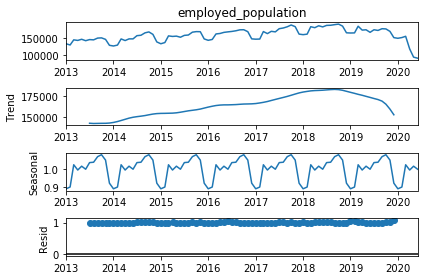

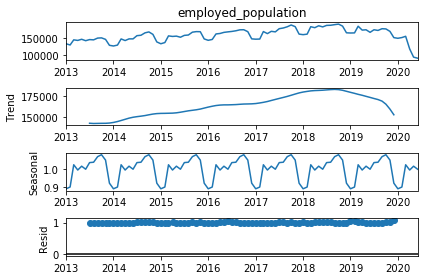

In [182]:
# ETS Decomposition 
result = seasonal_decompose(df_total['employed_population'],model ='multiplicative') 
  
# ETS plot  
result.plot() 

In [183]:
# Import the library 
from pmdarima import auto_arima 
# Import the library 
from pmdarima import auto_arima
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_total['employed_population'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=1535.337, BIC=1546.990, Time=0.685 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=1550.133, BIC=1554.795, Time=0.016 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=1552.164, BIC=1561.487, Time=0.120 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=1551.705, BIC=1561.027, Time=0.150 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=1548.159, BIC=1550.489, Time=0.019 seconds
Fit ARIMA(1,2,1)x(0,1,0,12) [intercept=True]; AIC=1532.648, BIC=1541.971, Time=0.239 seconds
Near non-invertible roots for order (1, 2, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,2,1)x(1,1,1,12) [intercept=True]; AIC=1537.514, BIC=1551.498, Time=0.938 seconds
Near non-invertible roots for order (1, 2, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit ci

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   90
Model:             SARIMAX(1, 2, 1)x(0, 1, [], 12)   Log Likelihood                -762.324
Date:                             Mon, 27 Jul 2020   AIC                           1532.648
Time:                                     09:57:19   BIC                           1541.971
Sample:                                          0   HQIC                          1536.374
                                              - 90                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.9744     23.421      0.170      0.865     -41.930      49.879
ar.L1          0.5260      0.065      8.116      0.000       0.399       0.653
ma.L1         -1.0000      0.118     -8.453      0.000      -1.232      -0.768
sigma2      3.113e+07   4.22e-08   7.39e+14      0.000    3.11e+07    3.11e+07
===================================================================================
Ljung-Box (Q):                       52.18   Jarque-Bera (JB):                28.30
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+33. Standard errors may be unstable.
"""

#### Fit Arima model to employment data

In [184]:
# Split data into train / test sets 
train = df_total.iloc[:len(df_total)-12] 
test = df_total.iloc[len(df_total)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['employed_population'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                employed_population   No. Observations:                   78
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -623.460
Date:                            Mon, 27 Jul 2020   AIC                           1256.920
Time:                                    09:57:25   BIC                           1267.792
Sample:                                01-01-2013   HQIC                          1261.210
                                     - 06-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0452      0.075     -0.606      0.544      -0.192       0.101
ar.S.L12       0.6765      0.976      0.693      0.488      -1.236       2.589
ar.S.L24      -0.0345      0.074     -0.467      0.641      -0.180       0.110
ma.S.L12      -0.7096      0.984     -0.721      0.471      -2.639       1.219
sigma2      1.289e+07   1.76e-07   7.32e+13      0.000    1.29e+07    1.29e+07
===================================================================================
Ljung-Box (Q):                       71.47   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.00   Prob(JB):                         0.94
Heteroskedasticity (H):               0.92   Skew:                             0.08
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.09e+29. Standard errors may be unstable.
"""

#### Predictions of ARIMA Model against the test set

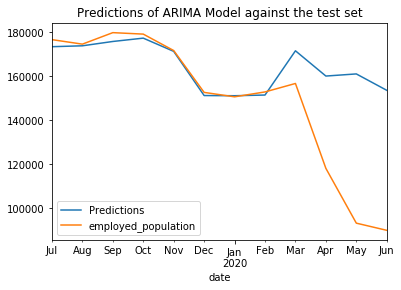

In [185]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
plt.title("Predictions of ARIMA Model against the test set")
test['employed_population'].plot(legend = True) 

#### Forecast using ARIMA model for next  6 months

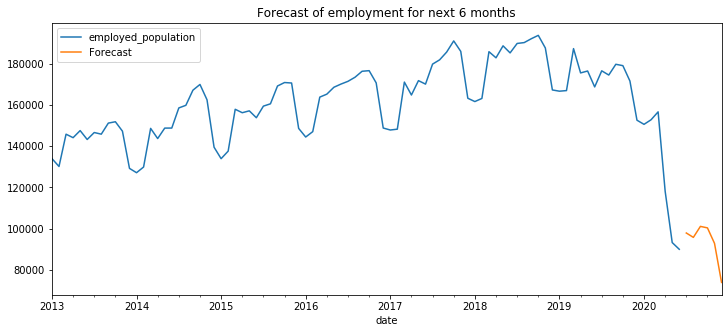

In [227]:
# Train the model on the full dataset 
model = model = SARIMAX(df_total['employed_population'],  
                        order = (1, 1, 1),  
                        seasonal_order =(1, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 1 year 
forecast = result.predict(start = len(df_total),  
                          end = (len(df_total)-1) + 1 *6,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
plt.title("Forecast of employment for next 6 months" )
df_total['employed_population'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

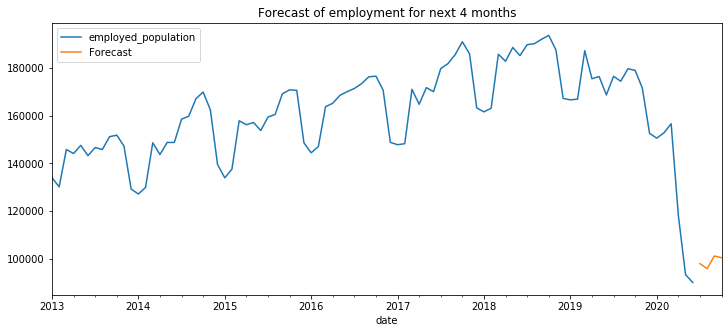

In [228]:
# Train the model on the full dataset 
model = model = SARIMAX(df_total['employed_population'],  
                        order = (1, 1, 1),  
                        seasonal_order =(1, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 1 year 
forecast = result.predict(start = len(df_total),  
                          end = (len(df_total)-1) + 1 *4,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
plt.title("Forecast of employment for next 4 months" )
df_total['employed_population'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

#### Forecast using ARIMA model for next 12 months

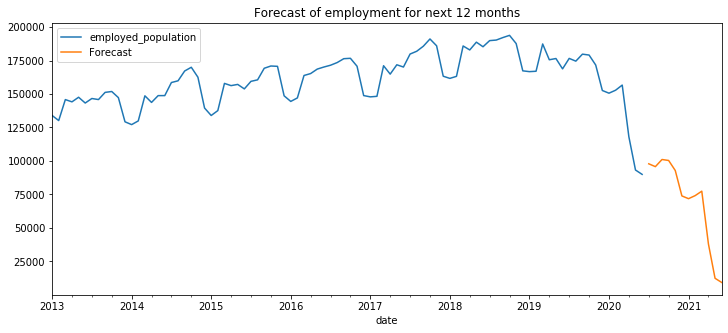

In [229]:
# Train the model on the full dataset 
model = model = SARIMAX(df_total['employed_population'],  
                        order = (1, 1, 1),  
                        seasonal_order =(1, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 1 year 
forecast = result.predict(start = len(df_total),  
                          end = (len(df_total)-1) + 1 *12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
plt.title("Forecast of employment for next 12 months" )
df_total['employed_population'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [250]:

stepwise_model = auto_arima(df_total['employed_population'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
future_forecast = stepwise_model.predict(n_periods=7)
train = df_total.loc['2013-01-01':'2020-06-01']
test.index=['2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01']

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1561.260, BIC=1572.979, Time=0.266 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1554.939, BIC=1559.627, Time=0.013 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1559.797, BIC=1569.172, Time=0.098 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1559.204, BIC=1568.579, Time=0.137 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1554.981, BIC=1557.325, Time=0.016 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=1556.538, BIC=1563.569, Time=0.048 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=1556.521, BIC=1563.553, Time=0.080 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=1558.502, BIC=1567.877, Time=0.277 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1558.350, BIC=1565.381, Time=0.028 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=1557.716, BIC=1564.747, Time=0.031 seconds
Fit ARIMA(1,1,1)x(0,1,0,12

In [251]:
result=stepwise_model.fit(train)

In [252]:
future_forecast = stepwise_model.predict(n_periods=6)

In [253]:
print(future_forecast)

[96856.45517403 93880.24304805 98164.36392208 96565.1517961
 88169.27267013 68229.39454416]


In [257]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['employed_population'])
pd.concat([df_total,future_forecast],axis=0).iplot()

In [203]:

import plotly
import cufflinks as cf

In [204]:

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [256]:
pd.concat([df_total,future_forecast],axis=0).iplot()

In [223]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [224]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_total,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2389.9817815038045
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2022.7047379869955
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1731.4268033092544
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1471.6876364764064
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1754.0220361382594
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1733.2189272871285
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1486.535602009827
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1470.138732664823
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2303.14176781865
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1977.7281724984366
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1697.8531624290563
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1404.508521686923
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2021.8637552169964
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1972.0202258615975
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1432.4113800059997
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1403.8864515473847
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1878.1292240323855
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1576.79875043817

In [225]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df_total, order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

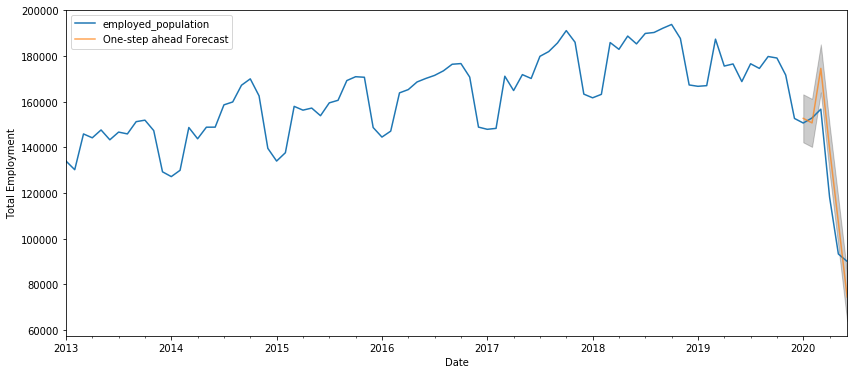

In [249]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_total['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Employment')
plt.legend()
plt.show()